In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image
#im=Image.open("./pairs.png")

imsize=512
bits=np.random.random(size=(imsize,imsize))

In [3]:
# Make the correct indices. Surprisingly hard! Want 32100123 in the middle
dim=512
(ys,xs)=np.indices((dim//2,dim//2) )
X=np.tile( np.hstack( (np.fliplr(xs),xs)), (2,1) )
Y=np.tile( np.vstack((np.flipud(ys),ys)), (1,2) )

#r=np.sqrt( (xs-(dim-1)/2.0)**2+(ys-(dim-1)/2.0)**2 )
r=np.sqrt(X**2+Y**2)

In [4]:
def sf_filter(vals,ctr,bw=2):
    # Follows original Eli Pelli 1990 : 1-octave bandwidth(FW@HH) centered at ctr
    # Chung 2002 had a denominator #(np.log10(ctr*bw)-np.log10(ctr)))/2.0, but let's skip
    filtd=0.5+np.cos(np.pi* (np.log2(vals)-np.log2(ctr)))/2 
    filtd[vals<ctr/bw]=0
    filtd[vals>ctr*bw]=0
    return filtd

In [72]:
np.max(r)

360.62445840513925

In [183]:
def norma(arr):
    arr -= np.min(arr)
    arr /= np.max(arr)
    return arr

In [10]:
def do_filter(bits,r,sf):
    ft=np.fft.fft2(bits)
    fts=fft.fftshift(ft)
    result= np.fft.ifft2( np.fft.ifftshift( fts*sf_filter(r,sf) ) )
    
    result8=np.array(real(result)) #/np.max((real(result)))*255+127,dtype='uint8')
    result8-=np.min(result8)
    result8/=np.max(result8)  
    result8 = np.array(result8*255,dtype='uint8')
                       
    im=Image.fromarray(result8)
                       
    return result,result8,im

In [11]:
bits=np.random.random(size=(imsize,imsize))
sf_range=np.logspace(np.log10(2),np.log10(50),15)
for sf in sf_range:
    #plt.imshow( real(result ) ) 
    result,result8,im=do_filter(bits,r,sf)
    im.save('sf_texture%0.2f.png'%sf )

NameError: name 'r' is not defined

(<matplotlib.image.AxesImage at 0x7f5209543970>, 49.99999999999999)

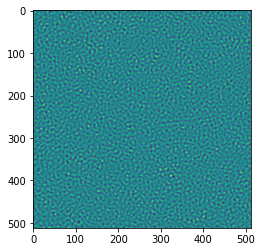

In [7]:
plt.imshow(result8),sf

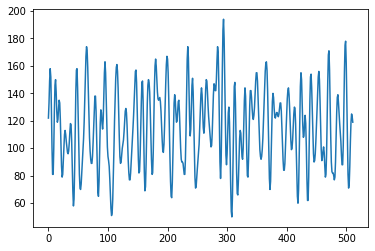

In [8]:
plt.plot( result8[200] )

In [9]:
frow=[abs(fft.fft( result8[n]  ))for n in np.arange(512)]


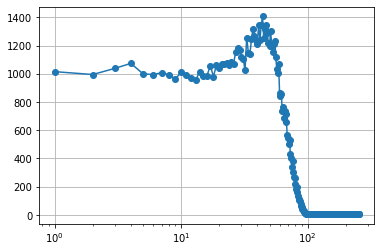

In [10]:
plt.plot( np.arange(1,256), np.mean(frow,axis=0)[1:256], 'o-' )
plt.semilogx()
plt.grid()

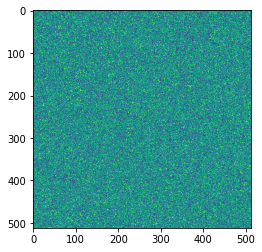

In [11]:
plt.imshow(bits)

In [12]:
from PIL import Image
im=Image.open("./pairs.png")
im_data=np.array( im )
cropped_bw=im_data[0:512,0:512,0]
np.shape( cropped_bw )
bits=cropped_bw
plt.imshow(bits)

FileNotFoundError: [Errno 2] No such file or directory: './pairs.png'

In [ ]:
plt.imshow(r[250:260,250:260]); plt.colorbar()

In [ ]:
plt.plot( real( np.fft.fftshift( np.fft.fft2(bits) ) )[256] )

In [ ]:
ctr=4
bw=2
fr=np.arange(0,256)

fr_filtd=sf_filter(fr,ctr)
plt.plot(fr,fr_filtd,'o-')
plt.semilogx()
plt.grid()

In [ ]:
np.hstack( [np.arange(0,4),np.arange(3,-1,-1)] )

In [ ]:
np.abs((np.arange(8)-3.5))-0.5

In [ ]:
(y,x)=np.indices((4,4))

In [13]:
r=( X**2+Y**2 )

In [14]:
r

array([[130050, 129541, 129034, ..., 129034, 129541, 130050],
       [129541, 129032, 128525, ..., 128525, 129032, 129541],
       [129034, 128525, 128018, ..., 128018, 128525, 129034],
       ...,
       [129034, 128525, 128018, ..., 128018, 128525, 129034],
       [129541, 129032, 128525, ..., 128525, 129032, 129541],
       [130050, 129541, 129034, ..., 129034, 129541, 130050]])

<ipython-input-4-3c2c4e28d0c8>:4: RuntimeWarning: divide by zero encountered in log2
  filtd=0.5+np.cos(np.pi* (np.log2(vals)-np.log2(ctr)))/2
<ipython-input-4-3c2c4e28d0c8>:4: RuntimeWarning: invalid value encountered in cos
  filtd=0.5+np.cos(np.pi* (np.log2(vals)-np.log2(ctr)))/2


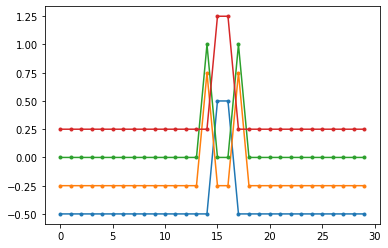

In [15]:
f=sf_filter(r,1)
plt.plot(f[254,240:270]-0.5, '.-')
plt.plot(f[255,240:270]-0.25, '.-')
plt.plot(f[256,240:270], '.-')
plt.plot(f[257,240:270]+0.25, '.-')

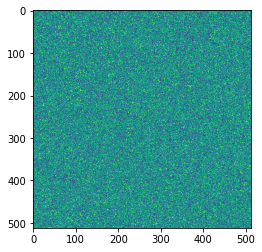

In [16]:
plt.imshow( np.real(np.fft.ifft2(ft) ) )

In [17]:
np.sum(sq)

NameError: name 'sq' is not defined

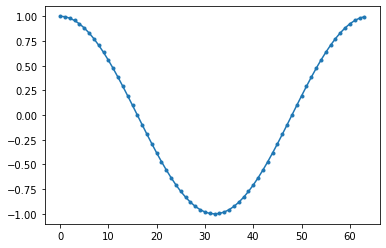

In [18]:
idx=np.arange(64); sq=np.cos(idx*np.pi/32)
plt.plot(idx,sq,'.-')

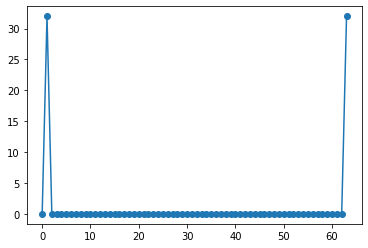

In [19]:
plt.plot(idx,np.real(fft.fft(sq)), 'o-' ) # 1th term is 1 cycle (NOT zeros term)

In [20]:
xr=

SyntaxError: invalid syntax (<ipython-input-20-3b93b8012701>, line 1)

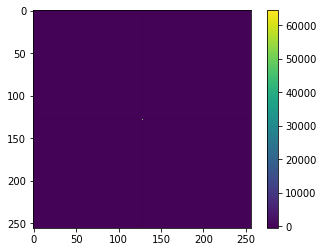

In [21]:
grid=np.sign(xs%128)*np.sign(ys%128)
plt.imshow( grid )
plt.imshow( real( np.fft.fftshift( np.fft.fft2(grid) ) ) ); plt.colorbar()

In [22]:
y,x=indices((512,512))

In [23]:
r2=np.sqrt(np.sqrt((x-256)**2+(y-256)**2) )

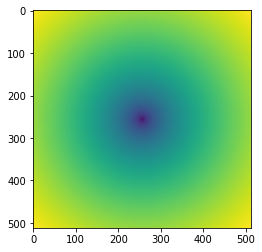

In [24]:
plt.imshow(r2)

In [25]:
np.mean(grat)

NameError: name 'grat' is not defined

In [26]:
grat=np.cos(np.pi*np.sqrt((x-255)**2+(y-255)**2)/256)/np.mean(grat)
plt.imshow(grat)
plt.figure()
plt.plot(grat[256])
plt.figure()
ifr=np.real( fft.fftshift(fft.fft2(grat)) )
plt.imshow( ifr[250:260,250:260]/np.max(ifr) )
plt.colorbar()

NameError: name 'grat' is not defined

In [27]:
plt.plot( ifr[256,250:260]/np.max(ifr), 'o-' )

NameError: name 'ifr' is not defined

In [12]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw

# font = ImageFont.truetype("Arial-Bold.ttf",14)
size_font=256
size_img=512
font = ImageFont.truetype("Sloan.otf",size_font)
img=Image.new("RGBA", (size_img,size_img),(0,0,0))
draw = ImageDraw.Draw(img)
draw.text((size_img/2-size_font/2,size_img/2-size_font/2),"Z",(255,255,255),font=font)
draw = ImageDraw.Draw(img)
img.save("a_test.png")

In [13]:
bits_e=np.array(img)[:,:,0]
result,result8,im=do_filter( bits_e, 5, r )
im.show()

NameError: name 'r' is not defined

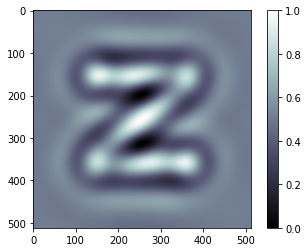

In [229]:
ft=fft.fft2(result8)
permute_phase=False
permute_mag=False
mag=np.abs(ft);      
phase=np.angle(ft)
if permute_phase:
    phase=np.random.permutation(phase)
if permute_mag:
    mag=np.random.permutation(mag)
regen=np.fft.ifft2(mag*np.exp(1j*phase) )
plt.imshow(norma( np.abs(regen) ), cmap="bone")

plt.colorbar()

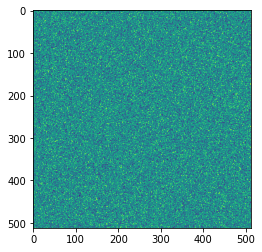

In [187]:
plt.imshow( bits )

In [98]:
phase

array([[-1.59162665,  3.01771289,  0.94233723, ...,  2.72986838,
        -0.98533527,  0.5599693 ],
       [-0.23080129, -2.11780319, -1.3214402 , ...,  0.90075962,
        -2.95105502, -1.79304688],
       [-2.80942988,  0.68143322,  0.47405198, ..., -1.98830986,
         1.48617084, -1.91521068],
       ...,
       [-2.70994714, -1.71914417,  2.27004998, ...,  0.85763779,
        -0.68640903,  0.83083019],
       [ 3.00500414,  2.47172255,  0.07280091, ...,  3.02755816,
        -0.30011209,  2.45744363],
       [ 0.26132508,  0.64333283, -2.96020491, ..., -1.06715757,
         1.97329553, -2.304842  ]])